# Demo: Exploring the Cars Dataset

We'll start this tutorial with a demo to whet your appetite for learning more. This section purposely moves quickly through many of the concepts (e.g. data, marks, encodings, aggregation, data types, selections, etc.)
We will return to treat each of these in more depth later in the tutorial, so don't worry if it all seems to go a bit quickly!

In the tutorial itself, this will be done from scratch in a blank notebook.
However, for the sake of people who want to look back on what we did live, I'll do my best to reproduce the examples and the discussion here.

## 1. Imports and Data

We'll start with importing the [Altair package](http://altair-viz.github.io/) and enabling the appropriate renderer (if necessary):

In [1]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

Now we'll use the [vega_datasets package](https://github.com/altair-viz/vega_datasets), to load an example dataset:

In [2]:
from vega_datasets import data

cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Notice that this data is in columnar format: that is, each column contains an attribute of a data point, and each row contains a single instance of the data (here, a single make & model of car).

## 2. Zero, One, and Two-dimensional Charts

Using Altair, we can being to explore this data.

The most basic chart contains the dataset, along with a mark to represent each row:

In [3]:
alt.Chart(cars).mark_point()

This is a pretty silly chart, because it consists of 406 points, all laid-out on top of each other.

To make it more interesting, we need to *encode* columns of the data into visual features of the plot (e.g. x position, y position, size, color, etc.)

Let's encode miles per gallon on the x-axis using the ``encode()`` method:

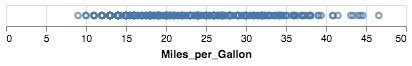

In [4]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon'
)

This is a bit better, but the ``point`` mark is probably not the best for a 1D chart like this.

Let's try the ``tick`` mark instead:

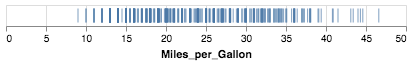

In [5]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon'
)

Or we can expand this into a 2D chart by also encoding the y value. We'll return to using ``point`` markers, and put ``Horsepower`` on the y-axis

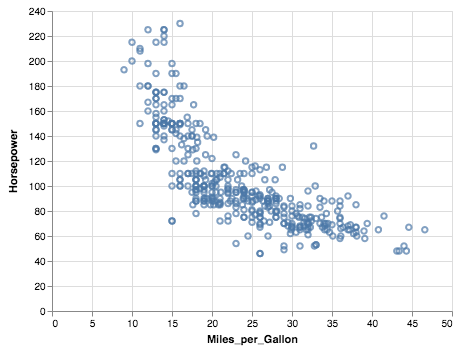

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
)

## 3 Simple Interactions

One of the nicest features of Altair is the grammar of interaction that it provides.
The simplest kind of interaction is the ability to pan and zoom along charts; Altair contains a shortcut to enable this via the ``interactive()`` method:

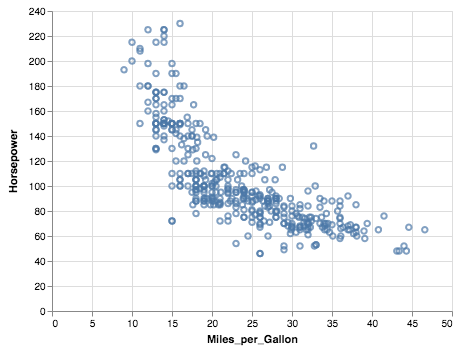

In [7]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower'
).interactive()

This lets you click and drag, as well as use your computer's scroll/zoom behavior to zoom in and out on the chart.

We'll see other interactions later.

## 4. A Third Dimension: Color

A 2D plot allows us to encode two dimensions of the data. Let's look at using color to encode a third:

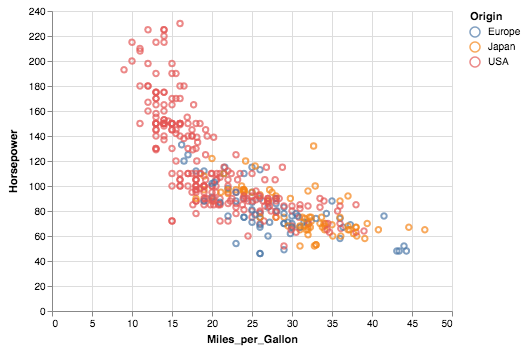

In [8]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
)

Notice that when we use a categorical value for color, it chooses an appropriate color map for categorical data.

Let's see what happens when we use a continuous color value:

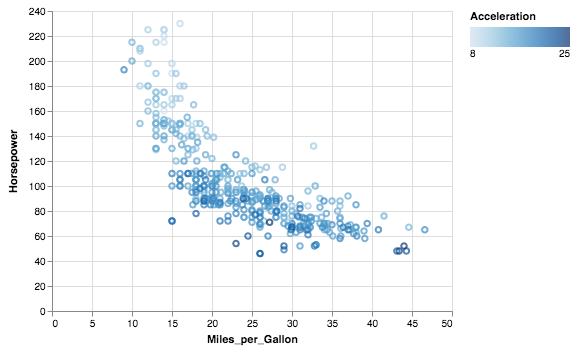

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Acceleration'
)

A continuous color results in a color scale that is appropriate for continuous data.

What about the in-between case: ordered categories, like number of cylinders?

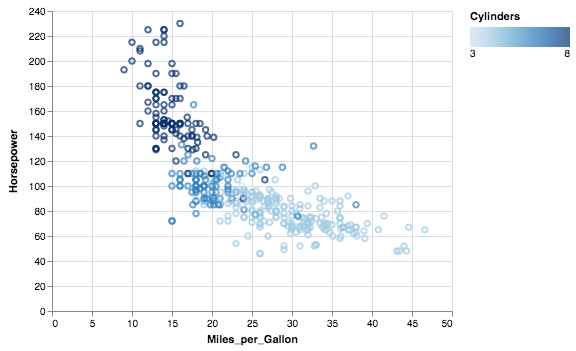

In [10]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders'
)

Altair still chooses a continuous value because the number of Cylinders is numerical.

We can improve this by specifying that the data should be treated as a discrete ordered value; we can do this by adding ``":O"`` ("O" for "ordinal" or "ordered categories") after the encoding: 


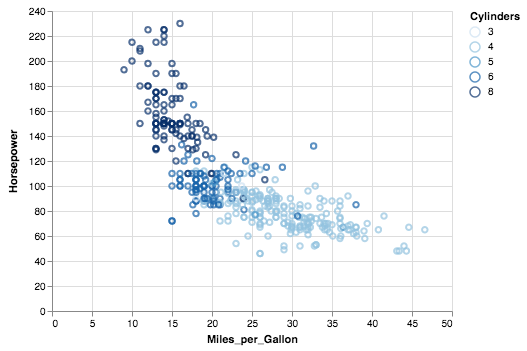

In [11]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Cylinders:O'
)

Now we get a discrete legend with an ordered color mapping.

## 5. Binning and aggregation

Let's return quickly to our 1D chart of miles per gallon:

In [ ]:
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon',
)

Another way we might represent this data is to creat a histogram: to bin the x data and show the count on the y axis.
In many plotting libraries this is done with a special method like ``hist()``. In Altair, such binning and aggregation is part of the declarative API.

To move beyond a simple field name, we use ``alt.X()`` for the x encoding, and we use ``'count()'`` for the y encoding:

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y='count()'
)

If we want more control over the bins, we can use ``alt.Bin`` to adjust bin parameters

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()'
)

If we apply another encoding (such as ``color``), the data will be automatically grouped within each bin:

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin'
)

If you prefer a separate plot for each category, the ``column`` encoding can help:

In [ ]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin',
    column='Origin'
)

Binning and aggregation works in two dimensions as well; we can use the ``rect`` marker and visualize the count using the color:

In [ ]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='count()'
)

Aggregations can be more than simple counts; we can also aggregate and compute the mean of a third quantity within each bin

In [ ]:
alt.Chart(cars).mark_rect().encode(
    x=alt.X('Miles_per_Gallon', bin=True),
    y=alt.Y('Horsepower', bin=True),
    color='mean(Weight_in_lbs)'
)

## 6. Time-Series & Layering

So far we've been ignoring the ``date`` column, but it's interesting to see the trends with time of, for example, miles per gallon:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Year',
    y='Miles_per_Gallon'
)

Each year has a number of cars, and a lot of overlap in the data.
We can clean this up a bit by plotting the mean at each x value:

In [ ]:
alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)',
)

Alternatively, we can change the mark to ``area`` and use the ``ci0`` and ``ci1`` mark to plot the confidence interval of the estimate of the mean:

In [ ]:
alt.Chart(cars).mark_area().encode(
    x='Year',
    y='ci0(Miles_per_Gallon)',
    y2='ci1(Miles_per_Gallon)'
)

Let's adjust this chart a bit: add some opacity, color by the country of origin, and make the width a bit wider, and add a cleaner axis title:

In [ ]:
alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

Finally, we can use Altair's layering API to layer a line chart representing the mean on top of the area chart representing the confidence interval:

In [ ]:
spread = alt.Chart(cars).mark_area(opacity=0.3).encode(
    x=alt.X('Year', timeUnit='year'),
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles per Gallon')),
    y2='ci1(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

lines = alt.Chart(cars).mark_line().encode(
    x=alt.X('Year', timeUnit='year'),
    y='mean(Miles_per_Gallon)',
    color='Origin'
).properties(
    width=800
)

spread + lines

## 7. Interactivity: Selections

Let's return to our scatter plot, and take a look at the other types of interactivity that Altair offers:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
)

Recall that you can add ``interactive()`` to the end of a chart to enable the most basic interactive scales:

In [ ]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).interactive()

Altair provides a general ``selection`` API for creating interactive plots; for example, here we create an interval selection:

In [ ]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(
    selection=interval
)

Currently this selection doesn't actually do anything, but we can change that by conditioning the color on this selection:

In [ ]:
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
    selection=interval
)

The nice thing about this selection API is that it *automatically* applies across any compound charts; for example, here we can horizontally concatenate two charts, and since they both have the same selection they both respond appropriately:

In [ ]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

We can do even more sophisticated things with selections as well.
For example, let's make a histogram of the number of cars by Origin, and stack it on our scatterplot:

In [ ]:
interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
    y='Horsepower',
    color=alt.condition(interval, 'Origin', alt.value('lightgray')),
    tooltip='Name'
).properties(
    selection=interval
)

hist = alt.Chart(cars).mark_bar().encode(
    x='count()',
    y='Origin',
    color='Origin'
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

scatter = base.encode(x='Miles_per_Gallon') | base.encode(x='Acceleration')

scatter & hist

This demo has covered a number of the available components of Altair.
In the following sections, we'll look into each of these a bit more systematically.